In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajmalraw","key":"aa24c856709268bb97251825bfe4533f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s youtube


ref                                                          title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                        Spotify and Youtube                                 9386454  2023-03-20 15:43:25.910000          33691        617  1.0              
datasnaek/youtube-new                                        Trending YouTube Video Statistics                 210575746  2019-06-03 00:56:47.177000         281927       5760  0.7941176        
advaypatil/youtube-statistics                                Youtube Statistics                                  1720179  2022-08-26 02:03:19.607000          13432        153  1.0              
nelgiriyewithana/global-youtub

In [ ]:
!kaggle datasets download -d rsrishav/youtube-trending-video-dataset -f IN_youtube_trending_data.csv -p /content

Dataset URL: https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset
License(s): CC0-1.0
 75% 112M/150M [00:00<00:00, 1.16GB/s]
100% 150M/150M [00:00<00:00, 974MB/s] 


In [ ]:
!unzip -o /content/IN_youtube_trending_data.csv.zip -d /content


unzip:  cannot find or open /content/IN_youtube_trending_data.csv.zip, /content/IN_youtube_trending_data.csv.zip.zip or /content/IN_youtube_trending_data.csv.zip.ZIP.


In [ ]:
!ls -lh /content | grep IN

-rw-r--r-- 1 root root 151M Apr 15  2024 IN_youtube_trending_data.csv


In [ ]:
# Rename to zip
!mv /content/IN_youtube_trending_data.csv /content/IN_youtube_trending_data.zip

# Unzip
!unzip -o /content/IN_youtube_trending_data.zip -d /content/


Archive:  /content/IN_youtube_trending_data.zip
  inflating: /content/IN_youtube_trending_data.csv  


In [ ]:
!ls /content | grep IN

IN_youtube_trending_data.csv
IN_youtube_trending_data.zip


In [ ]:
import pandas as pd

# Load the India YouTube dataset
df = pd.read_csv("/content/IN_youtube_trending_data.csv")

# Show first 5 rows
print(df.head())

# Show all column names
print(df.columns.tolist())

# Get column details (types + non-null counts)
print(df.info())


      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA    FoxStarHindi          24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g  Rehaan Records          10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh          10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA        T-Series          10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   VYRLOriginals          10   

          trending_date                                               tags  \
0  2020-08-12T00:00:

In [ ]:
import duckdb

# Connect to an in-memory DuckDB instance
con = duckdb.connect()

In [ ]:
import duckdb

con = duckdb.connect()

# Load dataset safely with options
con.execute("""
    CREATE OR REPLACE TABLE youtube AS
    SELECT *
    FROM read_csv_auto(
        '/content/IN_youtube_trending_data.csv',
        HEADER=TRUE,
        ALL_VARCHAR=TRUE,
        STRICT_MODE=FALSE,
        encoding='utf-8',
        ignore_errors=true
    )
""")

# Check first rows
print(con.execute("SELECT * FROM youtube LIMIT 5").fetchdf())

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId    channelTitle categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA    FoxStarHindi         24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g  Rehaan Records         10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh         10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA        T-Series         10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   VYRLOriginals         10   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  s

In [ ]:
import duckdb

con = duckdb.connect()

# Load dataset into DuckDB
con.execute("""
    CREATE OR REPLACE TABLE youtube AS
    SELECT *
    FROM read_csv_auto('/content/IN_youtube_trending_data.csv', ignore_errors=true)
""")

# Create a new table without the unwanted columns
con.execute("""
    CREATE OR REPLACE TABLE youtube_clean AS
    SELECT
        title,
        publishedAt,
        channelTitle,
        categoryId,
        trending_date,
        view_count,
        likes,
        dislikes,
        comment_count,
        comments_disabled,
        ratings_disabled,
        description
    FROM youtube
""")

# Verify
print(con.execute("SELECT * FROM youtube_clean LIMIT 5").fetchdf())

                                               title  \
0  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  Baarish (Official Video) Payal Dev,Stebin Ben ...   

                publishedAt    channelTitle  categoryId  \
0 2020-08-12 04:31:41+00:00    FoxStarHindi          24   
1 2020-08-11 09:00:11+00:00  Rehaan Records          10   
2 2020-08-11 07:30:02+00:00  Diljit Dosanjh          10   
3 2020-08-10 05:30:49+00:00        T-Series          10   
4 2020-08-11 05:30:13+00:00   VYRLOriginals          10   

              trending_date  view_count   likes  dislikes  comment_count  \
0 2020-08-12 00:00:00+00:00     9885899  224925   3979409         350210   
1 2020-08-12 00:00:00+00:00    11308046  655450     33242         405146   
2 2020-08-12 00:00:00+00:00     9140911  296533      6179          30058   
3 20

In [ ]:
con.execute("""CREATE OR REPLACE TABLE category_map AS
SELECT * FROM (
    VALUES
    (1,  'Film & Animation'),
    (2,  'Autos & Vehicles'),
    (10, 'Music'),
    (15, 'Pets & Animals'),
    (17, 'Sports'),
    (19, 'Travel & Events'),
    (20, 'Gaming'),
    (22, 'People & Blogs'),
    (23, 'Comedy'),
    (24, 'Entertainment'),
    (25, 'News & Politics'),
    (26, 'Howto & Style'),
    (27, 'Education'),
    (28, 'Science & Technology'),
    (29, 'Nonprofits & Activism'),
    (43, 'Shows')
) AS t(categoryId, category_name);
""")


In [ ]:
con.sql("""CREATE OR REPLACE TABLE youtube_final AS
SELECT y.*, c.category_name
FROM youtube_clean y
LEFT JOIN category_map c
USING (categoryId);
"""
)

In [ ]:
# See first 5 rows of updated table with category_name
print(con.execute("SELECT * FROM youtube_final LIMIT 5").fetchdf())


                                               title  \
0  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  Baarish (Official Video) Payal Dev,Stebin Ben ...   

                publishedAt    channelTitle  categoryId  \
0 2020-08-12 04:31:41+00:00    FoxStarHindi          24   
1 2020-08-11 09:00:11+00:00  Rehaan Records          10   
2 2020-08-11 07:30:02+00:00  Diljit Dosanjh          10   
3 2020-08-10 05:30:49+00:00        T-Series          10   
4 2020-08-11 05:30:13+00:00   VYRLOriginals          10   

              trending_date  view_count   likes  dislikes  comment_count  \
0 2020-08-12 00:00:00+00:00     9885899  224925   3979409         350210   
1 2020-08-12 00:00:00+00:00    11308046  655450     33242         405146   
2 2020-08-12 00:00:00+00:00     9140911  296533      6179          30058   
3 20

In [ ]:
con.sql("""SELECT
    AVG(view_count)   AS avg_views,
    MEDIAN(view_count) AS median_views
FROM youtube_final;


""")

┌──────────────────┬──────────────┐
│    avg_views     │ median_views │
│      double      │    double    │
├──────────────────┼──────────────┤
│ 2744086.14200922 │     961017.5 │
└──────────────────┴──────────────┘

In [ ]:
con.sql("""SELECT
    category_name,
    AVG(view_count) AS avg_views,
    MEDIAN(view_count) AS median_views
FROM youtube_final
GROUP BY category_name
ORDER BY category_name;
""")

┌───────────────────────┬────────────────────┬──────────────┐
│     category_name     │     avg_views      │ median_views │
│        varchar        │       double       │    double    │
├───────────────────────┼────────────────────┼──────────────┤
│ Autos & Vehicles      │  518969.3062015504 │     373039.5 │
│ Comedy                │ 2026517.2483766233 │     801827.5 │
│ Education             │  1067182.375249501 │     430276.0 │
│ Entertainment         │ 2084999.8310344827 │     959474.0 │
│ Film & Animation      │  2600854.470856102 │     930591.0 │
│ Gaming                │ 3261960.8044164036 │    1644126.0 │
│ Howto & Style         │ 1087337.6464952093 │     549129.0 │
│ Music                 │  6373735.870981995 │    2265485.0 │
│ News & Politics       │  801757.5476082005 │     521201.0 │
│ Nonprofits & Activism │        294521.4375 │     260451.5 │
│ People & Blogs        │ 1410358.1305916307 │     679807.0 │
│ Pets & Animals        │           266674.0 │     266674.0 │
│ Scienc

In [ ]:
con.sql("""SELECT
    category_name,
    AVG(LN(view_count + 1)) AS avg_log_views,
    MEDIAN(LN(view_count + 1)) AS median_log_views,
    AVG(LN(likes + 1) - LN(view_count + 1)) AS avg_log_like_ratio,
    MEDIAN(LN(likes + 1) - LN(view_count + 1)) AS median_log_like_ratio,
    AVG(LN(comment_count + 1) - LN(view_count + 1)) AS avg_log_comment_ratio,
    MEDIAN(LN(comment_count + 1) - LN(view_count + 1)) AS median_log_comment_ratio
FROM youtube_final
GROUP BY category_name;
""")

┌───────────────────────┬────────────────────┬────────────────────┬─────────────────────┬───────────────────────┬───────────────────────┬──────────────────────────┐
│     category_name     │   avg_log_views    │  median_log_views  │ avg_log_like_ratio  │ median_log_like_ratio │ avg_log_comment_ratio │ median_log_comment_ratio │
│        varchar        │       double       │       double       │       double        │        double         │        double         │          double          │
├───────────────────────┼────────────────────┼────────────────────┼─────────────────────┼───────────────────────┼───────────────────────┼──────────────────────────┤
│ Music                 │  14.54962258904571 │ 14.633299863418944 │ -3.2367638415416318 │    -3.107575042166575 │     -5.76116727353267 │       -5.778458508135403 │
│ Comedy                │ 13.680802684688429 │  13.59464999682199 │ -2.7037995650854487 │   -2.5727302538173964 │    -5.750320603332729 │       -5.652403225465195 │
│ News & P

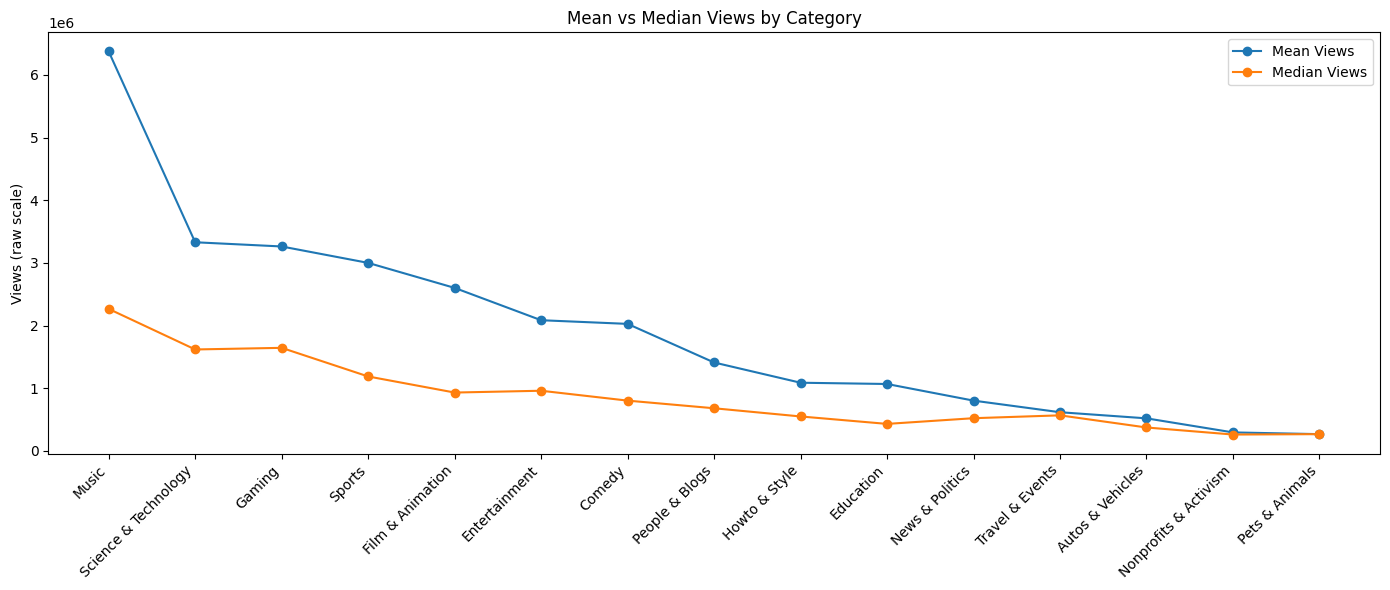

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example aggregated data
agg = df.groupby("category_name").agg(
    avg_views=("view_count", "mean"),
    median_views=("view_count", "median")
).reset_index()

# Sort categories for readability
agg = agg.sort_values("avg_views", ascending=False)

plt.figure(figsize=(14, 6))

# Plot mean
plt.plot(agg["category_name"], agg["avg_views"], marker="o", label="Mean Views", color="tab:blue")

# Plot median
plt.plot(agg["category_name"], agg["median_views"], marker="o", label="Median Views", color="tab:orange")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.ylabel("Views (raw scale)")
plt.title("Mean vs Median Views by Category")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
con.sql("""SELECT
    category_name,
    COUNT(*) AS video_count
FROM youtube_final
GROUP BY category_name
ORDER BY video_count DESC;
""")

┌───────────────────────┬─────────────┐
│     category_name     │ video_count │
│        varchar        │    int64    │
├───────────────────────┼─────────────┤
│ Entertainment         │       21170 │
│ Music                 │        9053 │
│ People & Blogs        │        5544 │
│ Comedy                │        4312 │
│ Science & Technology  │        2211 │
│ News & Politics       │        2195 │
│ Howto & Style         │        1983 │
│ Sports                │        1938 │
│ Film & Animation      │        1098 │
│ Education             │        1002 │
│ Gaming                │         951 │
│ Travel & Events       │         328 │
│ Autos & Vehicles      │         258 │
│ Nonprofits & Activism │          16 │
│ Pets & Animals        │           1 │
├───────────────────────┴─────────────┤
│ 15 rows                   2 columns │
└─────────────────────────────────────┘

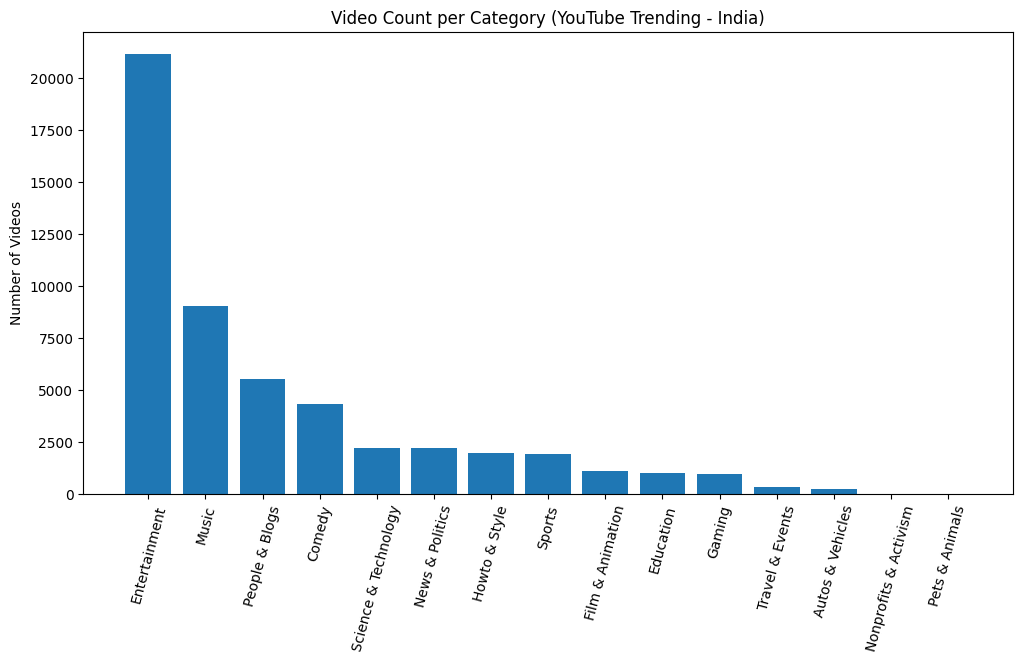

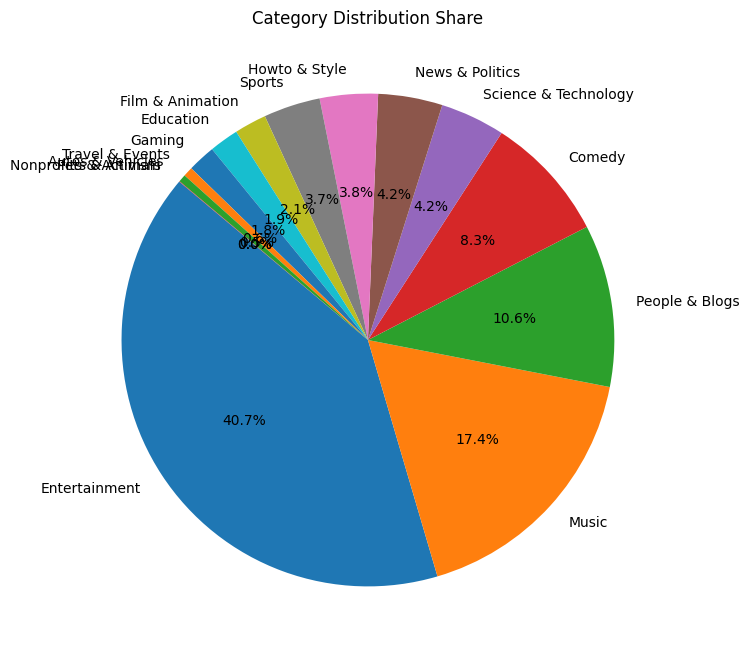

In [ ]:
import matplotlib.pyplot as plt

# Fetch the category count data into a DataFrame
df_category_count = con.sql("""SELECT
    category_name,
    COUNT(*) AS video_count
FROM youtube_final
GROUP BY category_name
ORDER BY video_count DESC;
""").fetchdf()


df_category_count = df_category_count.sort_values("video_count", ascending=False)

# Bar chart
plt.figure(figsize=(12,6))
plt.bar(df_category_count["category_name"], df_category_count["video_count"])
plt.xticks(rotation=75)
plt.ylabel("Number of Videos")
plt.title("Video Count per Category (YouTube Trending - India)")
plt.show()

# Percentage share
plt.figure(figsize=(8,8))
plt.pie(df_category_count["video_count"],
        labels=df_category_count["category_name"],
        autopct="%1.1f%%", startangle=140)
plt.title("Category Distribution Share")
plt.show()

In [ ]:
con.sql("""SELECT
    category_name,
    AVG(LOG(view_count + 1)) AS avg_log_views,
    AVG(LOG(likes + 1)) AS avg_log_likes,
    AVG(LOG(comment_count + 1)) AS avg_log_comments,
    AVG(CAST(likes AS DOUBLE) / NULLIF(view_count,0)) AS avg_like_ratio,
    AVG(CAST(comment_count AS DOUBLE) / NULLIF(view_count,0)) AS avg_comment_ratio
FROM youtube_final
GROUP BY category_name
ORDER BY avg_log_views DESC;
""")

┌───────────────────────┬────────────────────┬────────────────────┬────────────────────┬──────────────────────┬───────────────────────┐
│     category_name     │   avg_log_views    │   avg_log_likes    │  avg_log_comments  │    avg_like_ratio    │   avg_comment_ratio   │
│        varchar        │       double       │       double       │       double       │        double        │        double         │
├───────────────────────┼────────────────────┼────────────────────┼────────────────────┼──────────────────────┼───────────────────────┤
│ Music                 │ 6.3188208041974505 │  4.913112128591943 │ 3.8167776479806212 │ 0.060968100193903786 │  0.006674299156999674 │
│ Gaming                │  6.181046962788388 │  5.108041034528478 │  3.790524991952256 │  0.10301530267425962 │  0.006525655779435526 │
│ Science & Technology  │  6.176179662177243 │  4.983963675852288 │  3.660667814764008 │  0.08471534317177669 │   0.00836615355963511 │
│ Sports                │  6.117645206187598 │  

Now that the tables are recreated, you can run the cell again to generate the plot.

In [ ]:
con.sql("PRAGMA table_info(youtube_final)").df()


,cid,name,type,notnull,dflt_value,pk
0,0,title,VARCHAR,False,None,False
1,1,publishedAt,TIMESTAMP WITH TIME ZONE,False,None,False
2,2,channelTitle,VARCHAR,False,None,False
3,3,categoryId,BIGINT,False,None,False
4,4,trending_date,TIMESTAMP WITH TIME ZONE,False,None,False
5,5,view_count,BIGINT,False,None,False
6,6,likes,BIGINT,False,None,False
7,7,dislikes,BIGINT,False,None,False
8,8,comment_count,BIGINT,False,None,False
9,9,comments_disabled,BOOLEAN,False,None,False


In [ ]:
con.sql("""SELECT
    category_name,
    AVG(likes * 1.0 / NULLIF(view_count, 0)) AS likes_per_view,
    AVG(comment_count * 1.0 / NULLIF(view_count, 0)) AS comments_per_view,
    AVG(likes * 1.0 / NULLIF(view_count, 0)) +
    AVG(comment_count * 1.0 / NULLIF(view_count, 0)) AS engagement_index
FROM youtube_final
GROUP BY category_name
ORDER BY engagement_index DESC;
""")

┌───────────────────────┬──────────────────────┬───────────────────────┬──────────────────────┐
│     category_name     │    likes_per_view    │   comments_per_view   │   engagement_index   │
│        varchar        │        double        │        double         │        double        │
├───────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┤
│ Gaming                │  0.10301530267425962 │  0.006525655779435526 │  0.10954095845369514 │
│ Travel & Events       │  0.08242006708224996 │  0.012203984512050788 │  0.09462405159430075 │
│ Science & Technology  │  0.08471534317177669 │   0.00836615355963511 │   0.0930814967314118 │
│ Comedy                │  0.08225173898145155 │  0.004896705558598412 │  0.08714844454004997 │
│ Pets & Animals        │   0.0791303239160923 │  0.006779813555127234 │  0.08591013747121953 │
│ Education             │  0.07054250341643735 │ 0.0071239426050973146 │  0.07766644602153466 │
│ People & Blogs        │  0.06379129552

In [ ]:
import pandas as pd
import duckdb

# Calculate ratios directly from the youtube_final table using SQL
df_ratios = con.sql("""SELECT
    category_name,
    AVG(likes * 1.0 / NULLIF(view_count, 0)) AS likes_per_view,
    AVG(comment_count * 1.0 / NULLIF(view_count, 0)) AS comments_per_view,
    COUNT(*) AS video_count  -- Also get video count here
FROM youtube_final
GROUP BY category_name
""").fetchdf()


# Engagement Index (equal weight for likes + comments)
df_ratios["engagement_index"] = df_ratios["likes_per_view"] + df_ratios["comments_per_view"]

# Display the result
display(df_ratios)

,category_name,likes_per_view,comments_per_view,video_count,engagement_index
0,Music,0.060968,0.006674,9053,0.067642
1,Comedy,0.082252,0.004897,4312,0.087148
2,News & Politics,0.025592,0.002844,2195,0.028436
3,Film & Animation,0.051787,0.003566,1098,0.055353
4,Education,0.070543,0.007124,1002,0.077666
5,Nonprofits & Activism,0.043044,0.004959,16,0.048004
6,Entertainment,0.043014,0.002979,21170,0.045993
7,Gaming,0.103015,0.006526,951,0.109541
8,People & Blogs,0.063791,0.005568,5544,0.069359
9,Sports,0.043191,0.002753,1938,0.045944


In [ ]:
con.sql("""SELECT
    category_name,
    SUM(likes) * 1.0 / SUM(view_count) AS likes_per_view,
    SUM(comment_count) * 1.0 / SUM(view_count) AS comments_per_view,
    (SUM(likes) * 1.0 / SUM(view_count) + SUM(comment_count) * 1.0 / SUM(view_count)) AS engagement_index,
    COUNT(*) AS video_count
FROM youtube_final
WHERE view_count > 0
GROUP BY category_name
ORDER BY engagement_index DESC;
""")

┌───────────────────────┬──────────────────────┬───────────────────────┬──────────────────────┬─────────────┐
│     category_name     │    likes_per_view    │   comments_per_view   │   engagement_index   │ video_count │
│        varchar        │        double        │        double         │        double        │    int64    │
├───────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┼─────────────┤
│ Travel & Events       │  0.08292725770311389 │  0.011091869239152013 │   0.0940191269422659 │         328 │
│ Comedy                │  0.08579928524487461 │  0.005367975754097184 │   0.0911672609989718 │        4312 │
│ Pets & Animals        │   0.0791303239160923 │  0.006779813555127234 │  0.08591013747121953 │           1 │
│ Gaming                │  0.07273166168391247 │   0.00453965112572964 │  0.07727131280964211 │         951 │
│ Music                 │  0.05377620431292584 │  0.008075015475647433 │ 0.061851219788573275 │        9053 │
│ People &

In [ ]:
con.sql("""SELECT
    category_name,
    (SUM(likes) * 1.0 / SUM(view_count) + SUM(comment_count) * 1.0 / SUM(view_count)) AS engagement_index
FROM youtube_final
WHERE view_count > 0
GROUP BY category_name
ORDER BY engagement_index DESC;
""")

┌───────────────────────┬──────────────────────┐
│     category_name     │   engagement_index   │
│        varchar        │        double        │
├───────────────────────┼──────────────────────┤
│ Travel & Events       │   0.0940191269422659 │
│ Comedy                │   0.0911672609989718 │
│ Pets & Animals        │  0.08591013747121953 │
│ Gaming                │  0.07727131280964211 │
│ Music                 │ 0.061851219788573275 │
│ People & Blogs        │  0.05792879347820148 │
│ Science & Technology  │   0.0539221654402137 │
│ Education             │  0.05215157297546843 │
│ Howto & Style         │  0.04432868276276137 │
│ Autos & Vehicles      │  0.04302031842617449 │
│ Entertainment         │   0.0407636166017351 │
│ Nonprofits & Activism │  0.03677045580086169 │
│ Film & Animation      │  0.03459135353817721 │
│ Sports                │ 0.032266545430638456 │
│ News & Politics       │  0.02590430292699038 │
├───────────────────────┴──────────────────────┤
│ 15 rows           

In [ ]:
con.sql("""
SELECT
    category_name,
    SUM(view_count) AS total_views
FROM youtube_final
GROUP BY category_name;
""")


┌───────────────────────┬─────────────┐
│     category_name     │ total_views │
│        varchar        │   int128    │
├───────────────────────┼─────────────┤
│ Music                 │ 57701430840 │
│ Comedy                │  8738342375 │
│ News & Politics       │  1759857817 │
│ Film & Animation      │  2855738209 │
│ Education             │  1069316740 │
│ Nonprofits & Activism │     4712343 │
│ Entertainment         │ 44139446423 │
│ Gaming                │  3102124725 │
│ People & Blogs        │  7819025476 │
│ Sports                │  5813862516 │
│ Howto & Style         │  2156190553 │
│ Science & Technology  │  7360693599 │
│ Autos & Vehicles      │   133894081 │
│ Travel & Events       │   202222182 │
│ Pets & Animals        │      266674 │
├───────────────────────┴─────────────┤
│ 15 rows                   2 columns │
└─────────────────────────────────────┘

In [ ]:
import scipy.stats as stats

# Fetch data
df_views = con.sql("""
    SELECT category_name, view_count
    FROM youtube_final
""").fetchdf()

# Group by category
groups = [g["view_count"].values for _, g in df_views.groupby("category_name")]

# One-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("ANOVA F-stat:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0 → Some categories have significantly higher views (possible stardom effect).")
else:
    print("Fail to reject H0 → No strong evidence of stardom-driven categories.")


ANOVA F-stat: 231.66027161067612
p-value: 0.0
Reject H0 → Some categories have significantly higher views (possible stardom effect).


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    df_views["view_count"],
    df_views["category_name"],
    alpha=0.05
)

print(tukey)


                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
        group1                group2           meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------------------------------
     Autos & Vehicles                Comedy  1507547.9422 0.0592    -24464.7064  3039560.5908  False
     Autos & Vehicles             Education    548213.069 0.9988  -1120551.3789   2216977.517  False
     Autos & Vehicles         Entertainment  1566030.5248   0.03     68850.5253  3063210.5243   True
     Autos & Vehicles      Film & Animation  2081885.1647 0.0018    428125.8562  3735644.4731   True
     Autos & Vehicles                Gaming  2742991.4982    0.0   1065089.7793  4420893.2171   True
     Autos & Vehicles         Howto & Style   568368.3403 0.9969  -1013619.7081  2150356.3887  False
     Autos & Vehicles                 Music  5854766.5648    0.0   4345570.9656   7363962.1

In [ ]:
# Define star-driven categories
star_categories = ["Music", "Entertainment", "Gaming", "Film & Animation"]

# Fetch necessary columns from youtube_final into df_videos
df_videos = con.sql("""
    SELECT
        category_name,
        view_count,
        likes,
        comment_count
    FROM youtube_final
""").fetchdf()

# Total views across all categories
total_views = df_videos["view_count"].sum()

# Total views from star-driven categories
star_views = df_videos[df_videos["category_name"].isin(star_categories)]["view_count"].sum()

# Percentage of views from stardom categories
views_percentage = (star_views / total_views) * 100

# Engagement = likes + comments (you can also add shares if available)
df_videos["engagement"] = df_videos["likes"] + df_videos["comment_count"]

# Total engagement across all categories
total_engagement = df_videos["engagement"].sum()

# Engagement from star-driven categories
star_engagement = df_videos[df_videos["category_name"].isin(star_categories)]["engagement"].sum()

# Percentage of engagement from stardom categories
engagement_percentage = (star_engagement / total_engagement) * 100

print(f"Stardom categories views share: {views_percentage:.2f}%")
print(f"Stardom categories engagement share: {engagement_percentage:.2f}%")

Stardom categories views share: 75.46%
Stardom categories engagement share: 73.51%


In [ ]:
# Define star-driven categories
star_categories = ["Music", "Entertainment", "Gaming", "Film and Animation"]

# Split data
star_df = df_videos[df_videos["category_name"].isin(star_categories)]
nonstar_df = df_videos[~df_videos["category_name"].isin(star_categories)]

# Calculate group means
metrics = ["like_ratio", "comment_ratio", "view_count"]

star_means = star_df[metrics].mean()
nonstar_means = nonstar_df[metrics].mean()

print("⭐ Star-driven categories means:")
print(star_means)

print("\n🚀 Non-star categories means:")
print(nonstar_means)

print("\n🔍 Ratio comparison (Non-star / Star):")
print(nonstar_means / star_means)


⭐ Star-driven categories means:
like_ratio       5.005832e-02
comment_ratio    4.159986e-03
view_count       3.366363e+06
dtype: float64

🚀 Non-star categories means:
like_ratio       6.191076e-02
comment_ratio    5.094583e-03
view_count       1.815289e+06
dtype: float64

🔍 Ratio comparison (Non-star / Star):
like_ratio       1.236773
comment_ratio    1.224664
view_count       0.539243
dtype: float64


/tmp/ipython-input-828484260.py:43: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-828484260.py:43: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


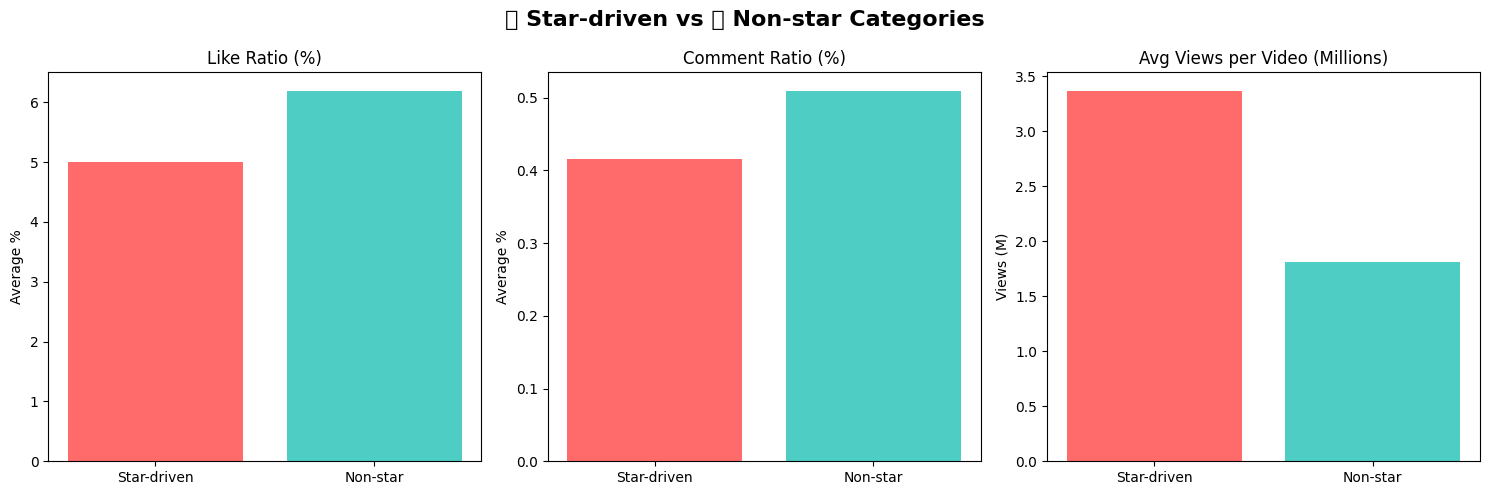

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your results
star_means = {
    "like_ratio": 5.005832e-02,
    "comment_ratio": 4.159986e-03,
    "view_count": 3.366363e+06
}

nonstar_means = {
    "like_ratio": 6.191076e-02,
    "comment_ratio": 5.094583e-03,
    "view_count": 1.815289e+06
}

# Convert to DataFrame for easy plotting
df_compare = pd.DataFrame([star_means, nonstar_means], index=["Star-driven", "Non-star"])

# Normalize engagement metrics (optional for clearer visualization)
df_compare_plot = df_compare.copy()
df_compare_plot[["like_ratio", "comment_ratio"]] *= 100  # convert ratios to %

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Like ratio
axes[0].bar(df_compare_plot.index, df_compare_plot["like_ratio"], color=["#FF6B6B", "#4ECDC4"])
axes[0].set_title("Like Ratio (%)")
axes[0].set_ylabel("Average %")

# Comment ratio
axes[1].bar(df_compare_plot.index, df_compare_plot["comment_ratio"], color=["#FF6B6B", "#4ECDC4"])
axes[1].set_title("Comment Ratio (%)")
axes[1].set_ylabel("Average %")

# Views
axes[2].bar(df_compare_plot.index, df_compare_plot["view_count"]/1e6, color=["#FF6B6B", "#4ECDC4"])
axes[2].set_title("Avg Views per Video (Millions)")
axes[2].set_ylabel("Views (M)")

plt.suptitle("⭐ Star-driven vs 🚀 Non-star Categories", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()
